In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [83]:
DCCC = pd.read_csv('Default-of-Credit-Card-Clients-1.csv')
DCCC = DCCC[1:]
Col_Names = 'ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23'

In [84]:
T_set, TE_set = train_test_split(DCCC, test_size=0.2, random_state=42)

# Saving the training and testing sets to CSV files
T_set.to_csv('training.csv', index=False)
TE_set.to_csv('testing.csv', index=False)

In [85]:
A = DCCC.drop(['Y'], axis = 1)
B = DCCC['Y']
DCCC_train, DCCC_test, b_train, b_test = train_test_split(A,B, train_size = 0.8, test_size=0.2)

Train_Npy = DCCC_train.to_numpy()
Test_Npy = DCCC_test.to_numpy()

np.savetxt("training.csv", Train_Npy, fmt = "%s", delimiter=',', header=Col_Names,  comments='')
np.savetxt("testing.csv", Test_Npy, fmt = "%s", delimiter=',', header=Col_Names, comments='')

-----------------------------------------------
--------------------Entropy--------------------
-----------------------------------------------


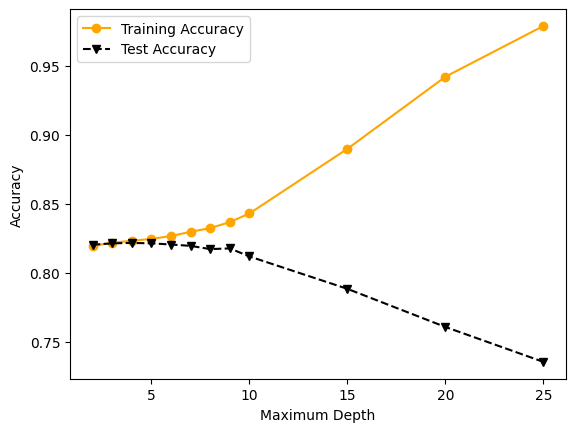

<Figure size 2000x2000 with 0 Axes>

In [86]:
#Entropy
Maximum_Depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]

Train_Accuracy = [0] * len(Maximum_Depths)
Test_Accuracy = [0] * len(Maximum_Depths)

for index, depth in enumerate(Maximum_Depths):
    Entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    Entropy.fit(DCCC_train, b_train)

    b_predict_Train = Entropy.predict(DCCC_train)
    b_predict_Test = Entropy.predict(DCCC_test)

    Train_Accuracy[index] = accuracy_score(b_train, b_predict_Train)
    Test_Accuracy[index] = accuracy_score(b_test, b_predict_Test)

print('-----------------------------------------------')
print('--------------------Entropy--------------------')
print('-----------------------------------------------')
plt.plot(Maximum_Depths, Train_Accuracy, 'o-', color='orange', label='Training Accuracy')
plt.plot(Maximum_Depths, Test_Accuracy, 'v--', color='black', label='Test Accuracy')
plt.legend()
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')

plt.figure(figsize=(20, 20))

plt.show()


In [87]:
print('We can see that the training accuracy goes up and the test accuracy goes down as we increase the max depth. The graphs also become more steep as we use more depth from 10.')

print('This means that our decision tree is too complex and fits the training data too well, but fails to generalize to new data (test data). This is called overfitting. It also shows the drawback of entropy.')

We can see that the training accuracy goes up and the test accuracy goes down as we increase the max depth. The graphs also become more steep as we use more depth from 10.
This means that our decision tree is too complex and fits the training data too well, but fails to generalize to new data (test data). This is called overfitting. It also shows the drawback of entropy.


-----------------------------------------------
------------------Euclidean--------------------
-----------------------------------------------


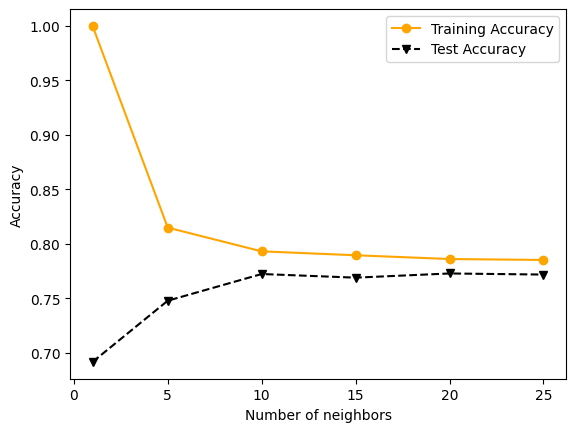

<Figure size 1000x2000 with 0 Axes>

In [88]:
# Eculidean

print('-----------------------------------------------')
print('------------------Euclidean--------------------')
print('-----------------------------------------------')


K_Neighbors = [1, 5, 10, 15, 20, 25]

Train_Accuracy = [
    accuracy_score(b_train, KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2).fit(DCCC_train, b_train).predict(DCCC_train))
    for k in K_Neighbors
]

Test_Accuracy = [
    accuracy_score(b_test, KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2).fit(DCCC_train, b_train).predict(DCCC_test))
    for k in K_Neighbors
]

plt.plot(K_Neighbors, Train_Accuracy, 'o-', label='Training Accuracy', color='orange')
plt.plot(K_Neighbors, Test_Accuracy, 'v--', label='Test Accuracy', color='black')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.figure(figsize=(10, 20))

plt.show()

-----------------------------------------------
-------------------Cosine----------------------
-----------------------------------------------


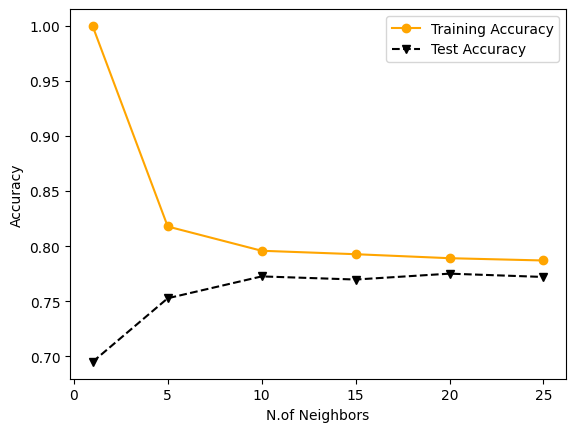

<Figure size 2000x2000 with 0 Axes>

In [89]:
# Cosine
print('-----------------------------------------------')
print('-------------------Cosine----------------------')
print('-----------------------------------------------')
K_Neighbors = [1, 5, 10, 15, 20, 25]

Train_Accuracy = [
    accuracy_score(b_train, KNeighborsClassifier(n_neighbors=k, metric='cosine').fit(DCCC_train, b_train).predict(DCCC_train))
    for k in K_Neighbors
]

Test_Accuracy = [
    accuracy_score(b_test, KNeighborsClassifier(n_neighbors=k, metric='cosine').fit(DCCC_train, b_train).predict(DCCC_test))
    for k in K_Neighbors
]

plt.plot(K_Neighbors, Train_Accuracy, 'o-', color='orange', label='Training Accuracy')
plt.plot(K_Neighbors, Test_Accuracy, 'v--', color='black', label='Test Accuracy')
plt.legend()
plt.xlabel('N.of Neighbors')
plt.ylabel('Accuracy')
plt.figure(figsize=(20, 20))

plt.show()

In [90]:
print('We can see that the training accuracy drops a lot and the test accuracy goes up to 5 neighbors for both Eculidean and Cosine distance.')
print('After 5 neighbors, the test accuracy improves very little. We don’t have the problem of overfitting anymore.')
print('But we still need to choose the best number of neighbors that gives us high training accuracy and high test accuracy for the best performance.')

We can see that the training accuracy drops a lot and the test accuracy goes up to 5 neighbors for both Eculidean and Cosine distance.
After 5 neighbors, the test accuracy improves very little. We don’t have the problem of overfitting anymore.
But we still need to choose the best number of neighbors that gives us high training accuracy and high test accuracy for the best performance.


In [94]:
print('Based on the graph depicting the accuracy of the K-Nearest Neighbor Classifier in question 3, we can conclude that the highest accuracy on the testing data is achieved when k is set to 25.')
k = 25
KNN_Class = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
KNN_Class.fit(DCCC_train, b_train)
b_Predict = KNN_Class.predict(DCCC_test)
ACC = accuracy_score(b_test, b_Predict)

print(f"Non-Standardized-Data: {ACC}")

S = StandardScaler()

DCCC_Train_Standard = S.fit_transform(DCCC_train)
DCCC_Test_Standard = S.transform(DCCC_test)
KNN_Class.fit(DCCC_Train_Standard, b_train)

b_Predict_Standard = KNN_Class.predict(DCCC_Test_Standard)

ACC_Standard = accuracy_score(b_test, b_Predict_Standard)
print(f"Standardized-Data: {ACC_Standard}")

Based on the graph depicting the accuracy of the K-Nearest Neighbor Classifier in question 3, we can conclude that the highest accuracy on the testing data is achieved when k is set to 25.
Non-Standardized-Data: 0.7718333333333334
Standardized-Data: 0.8131666666666667


In [95]:
print('By standardizing the data we can see there is an increasing testing accuracy.')

By standardizing the data we can see there is an increasing testing accuracy.
